In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [3]:
import io
df_wine = pd.read_csv('wine-clustering.csv')
df_wine

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [4]:
kolom=len(df_wine.columns) #untuk mengilangkan nilai null pada dataframe seperti '?' dan baris 'NaN'/baris yang kosong
for i in range (0,kolom):
  df_wine=df_wine[df_wine.iloc[:,i]!='?']
  df_wine=df_wine[df_wine.iloc[:,i]!=' ']
  df_wine=df_wine[~df_wine.iloc[:,i].isna()]
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


<Axes: >

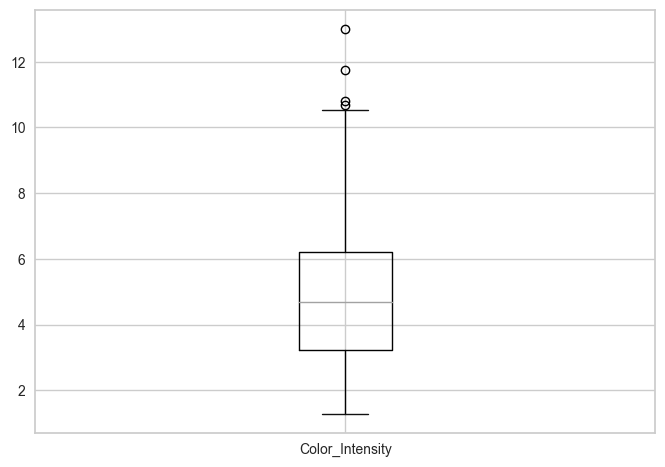

In [5]:
df_wine[['Color_Intensity']].boxplot()

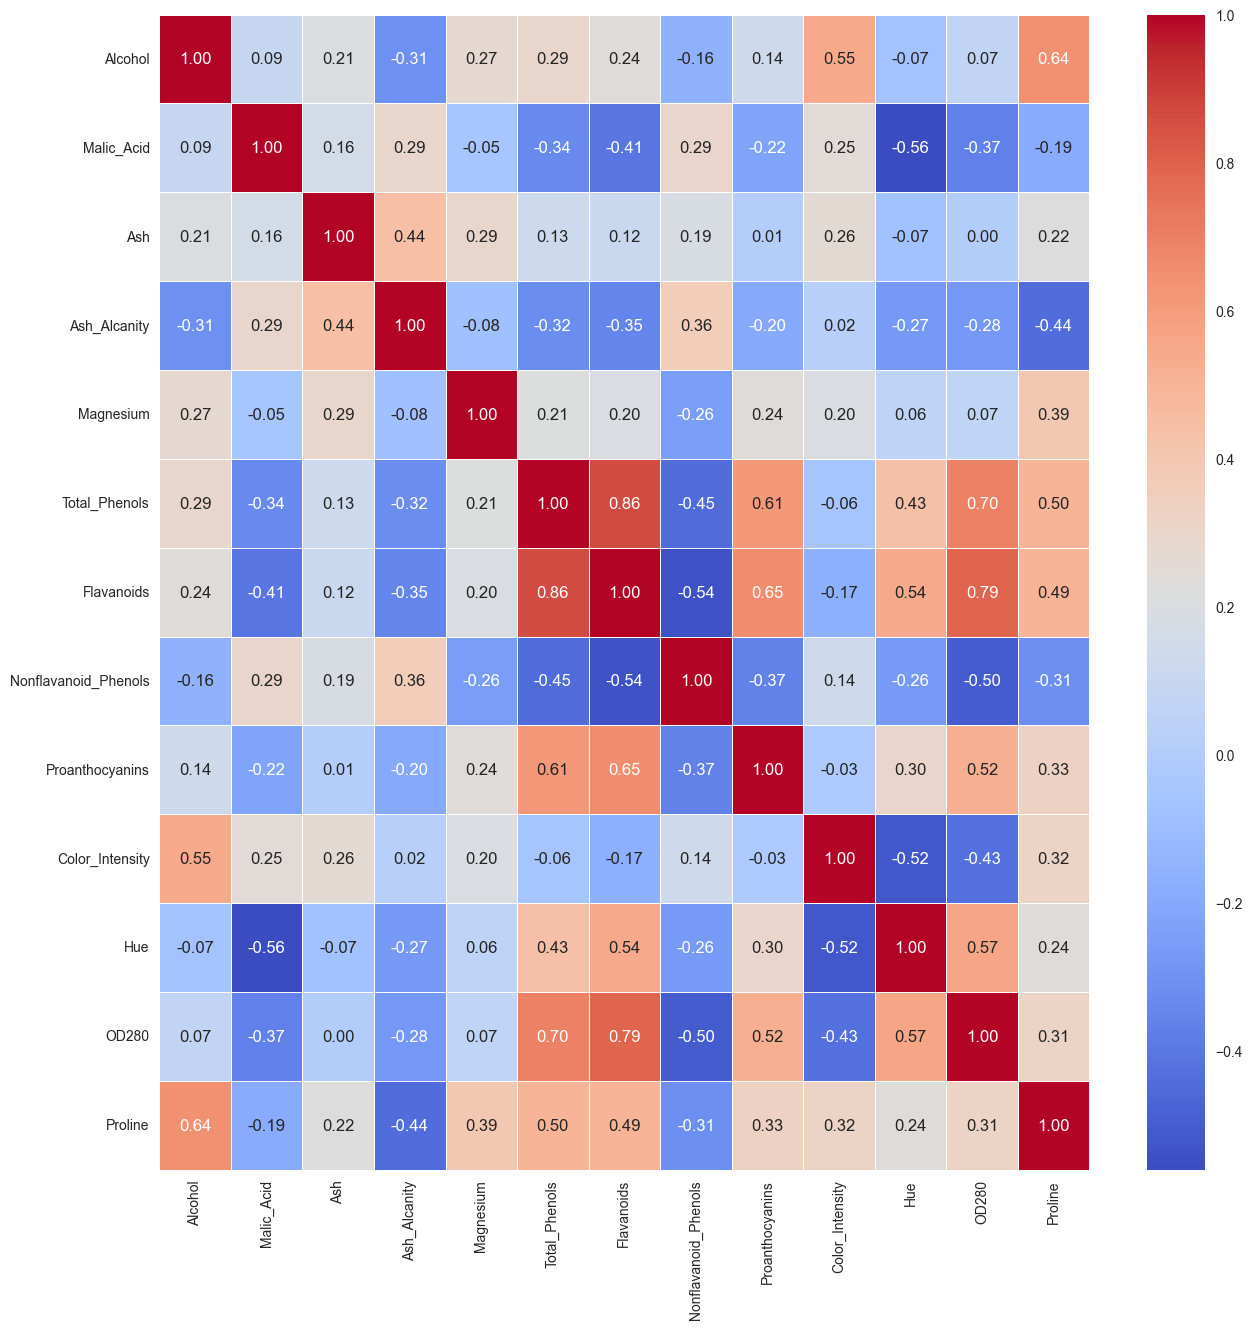

In [6]:
import seaborn as sns
plt.figure(figsize=(15,15))# bahwa Total_Phenols,Flavanoids, dan OD280 memliki pengaruh yang besar
sns.heatmap(df_wine.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

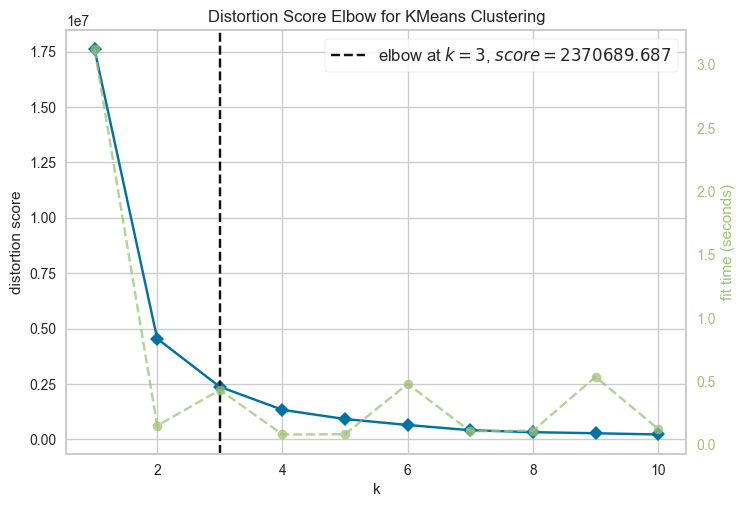

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
visualizer=KElbowVisualizer(KMeans(),k=(1,11))
visualizer.fit(df_wine)
visualizer.poof()

#plt.figure(figsize=(10, 6), dpi=20)
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(df_wine)
print(y_kmeans)

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [9]:
df_wine

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [10]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_wine, y_kmeans)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.571138193786884


In [11]:
import numpy as np
df_numpy = np.array(df_wine)

<Figure size 800x550 with 0 Axes>

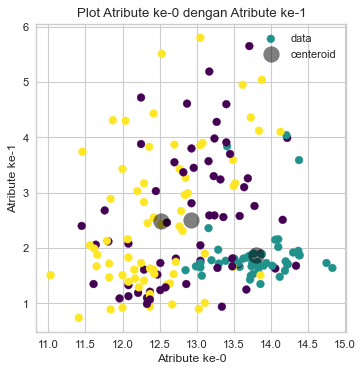

<Figure size 800x550 with 0 Axes>

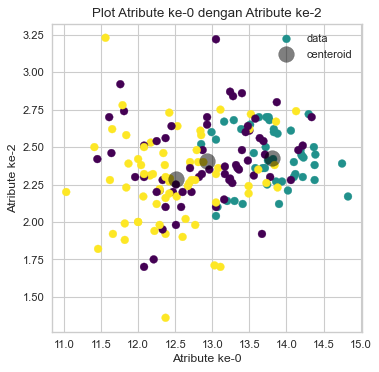

<Figure size 800x550 with 0 Axes>

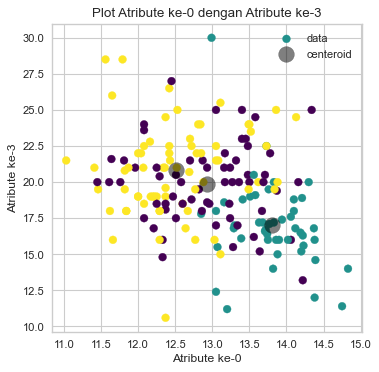

<Figure size 800x550 with 0 Axes>

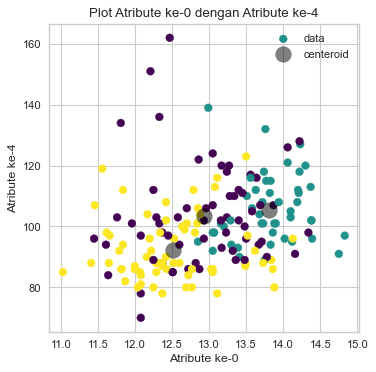

<Figure size 800x550 with 0 Axes>

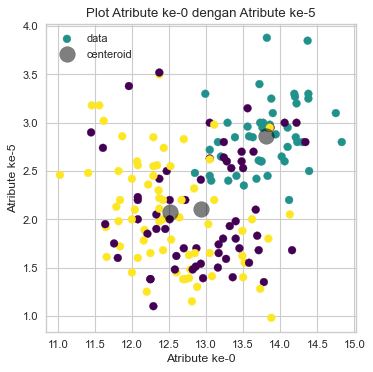

<Figure size 800x550 with 0 Axes>

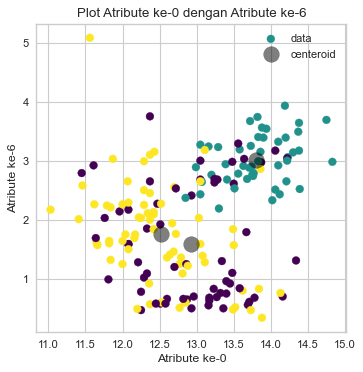

<Figure size 800x550 with 0 Axes>

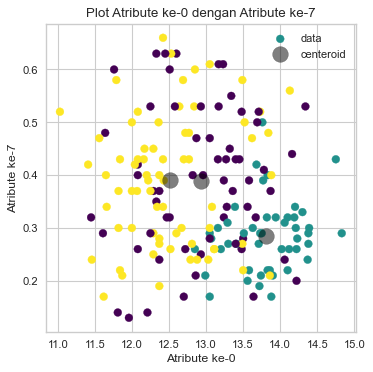

<Figure size 800x550 with 0 Axes>

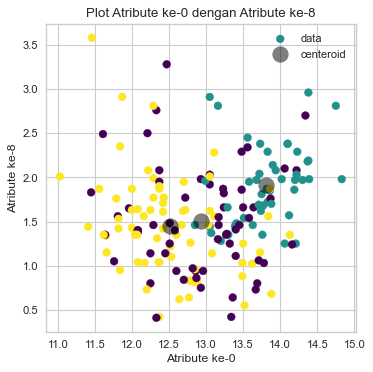

<Figure size 800x550 with 0 Axes>

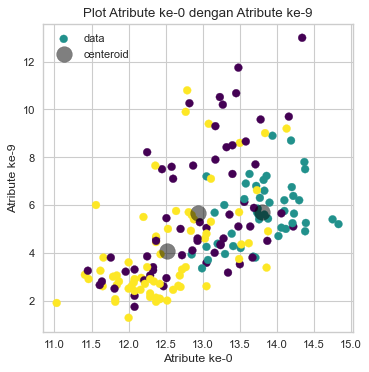

<Figure size 800x550 with 0 Axes>

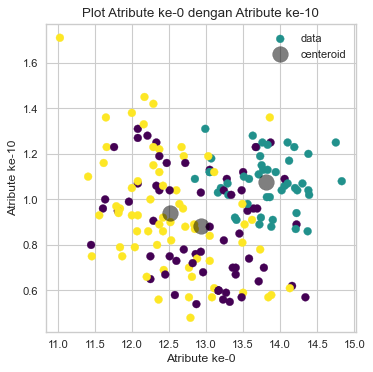

<Figure size 800x550 with 0 Axes>

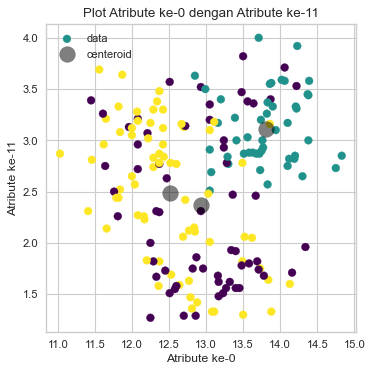

<Figure size 800x550 with 0 Axes>

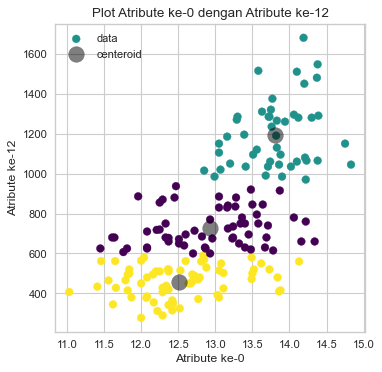

<Figure size 800x550 with 0 Axes>

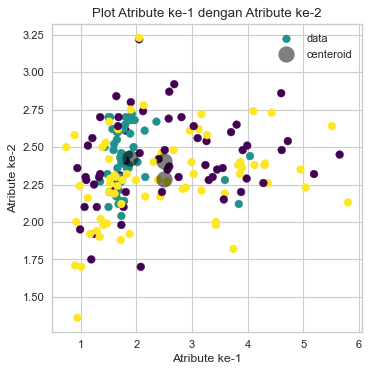

<Figure size 800x550 with 0 Axes>

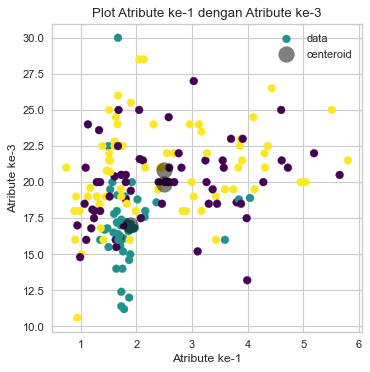

<Figure size 800x550 with 0 Axes>

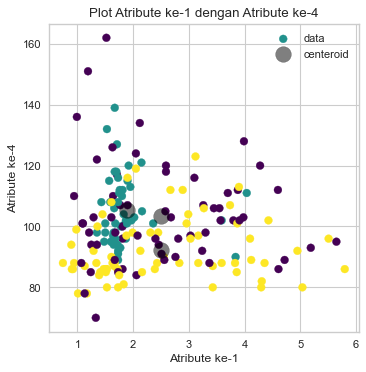

<Figure size 800x550 with 0 Axes>

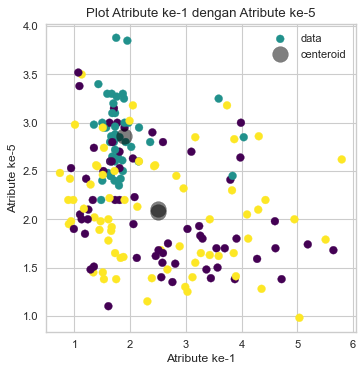

<Figure size 800x550 with 0 Axes>

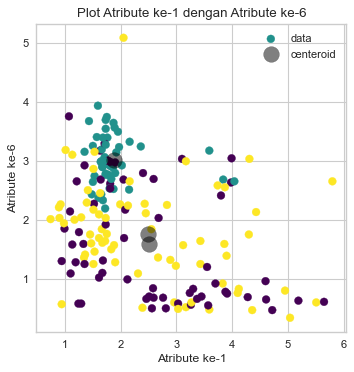

<Figure size 800x550 with 0 Axes>

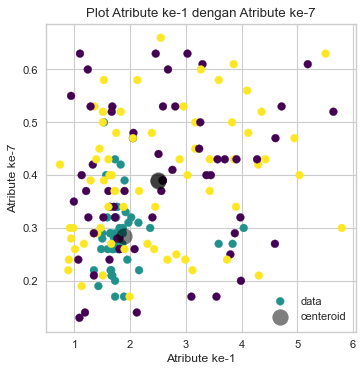

<Figure size 800x550 with 0 Axes>

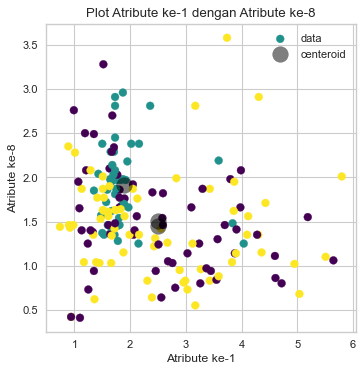

<Figure size 800x550 with 0 Axes>

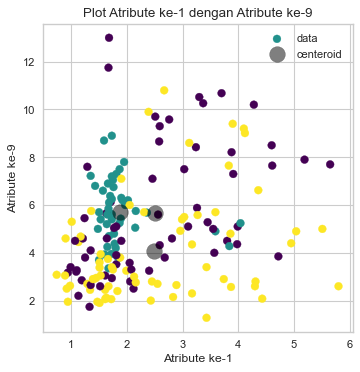

<Figure size 800x550 with 0 Axes>

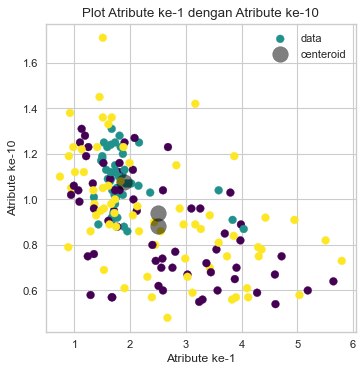

<Figure size 800x550 with 0 Axes>

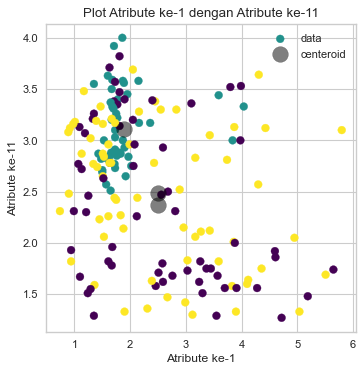

<Figure size 800x550 with 0 Axes>

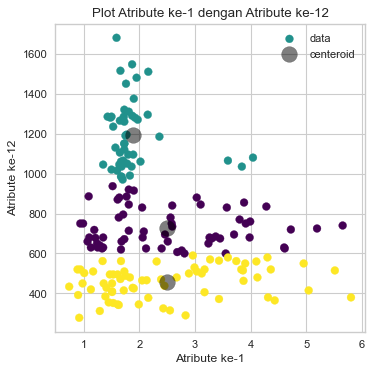

<Figure size 800x550 with 0 Axes>

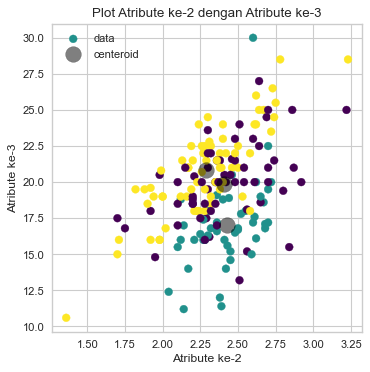

<Figure size 800x550 with 0 Axes>

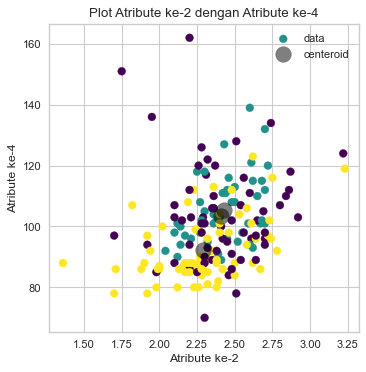

<Figure size 800x550 with 0 Axes>

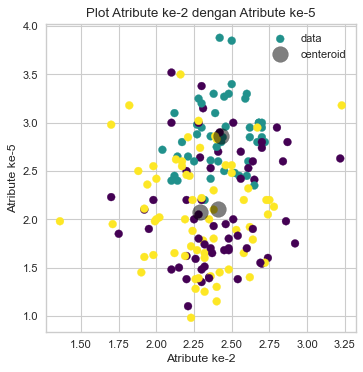

<Figure size 800x550 with 0 Axes>

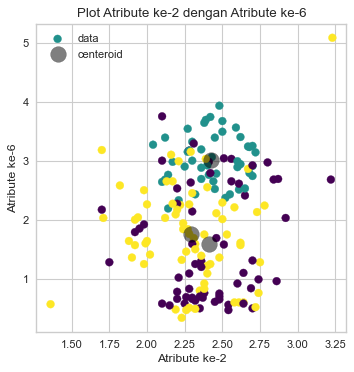

<Figure size 800x550 with 0 Axes>

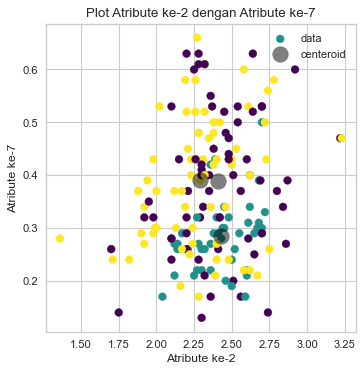

<Figure size 800x550 with 0 Axes>

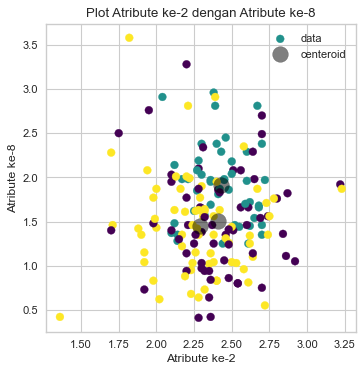

<Figure size 800x550 with 0 Axes>

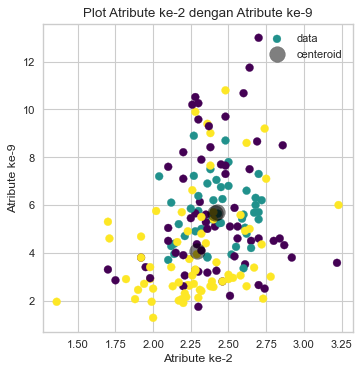

<Figure size 800x550 with 0 Axes>

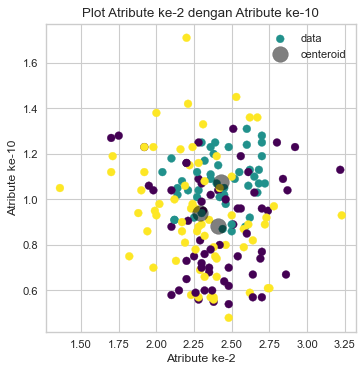

<Figure size 800x550 with 0 Axes>

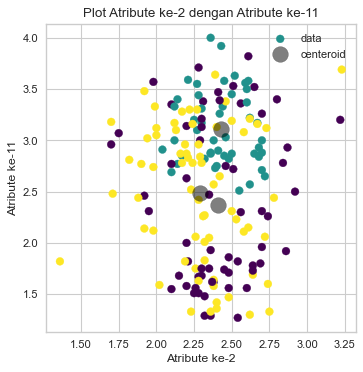

<Figure size 800x550 with 0 Axes>

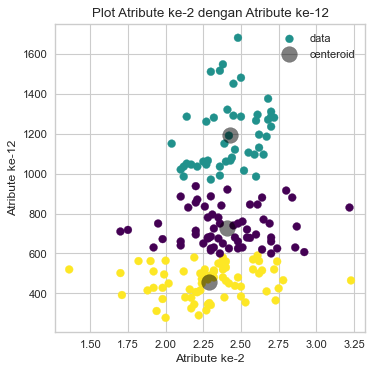

<Figure size 800x550 with 0 Axes>

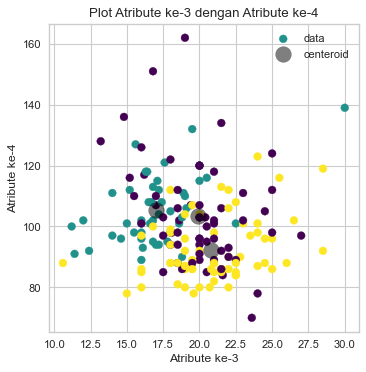

<Figure size 800x550 with 0 Axes>

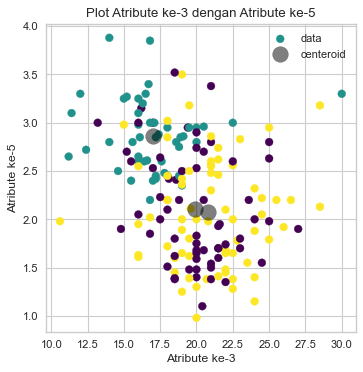

<Figure size 800x550 with 0 Axes>

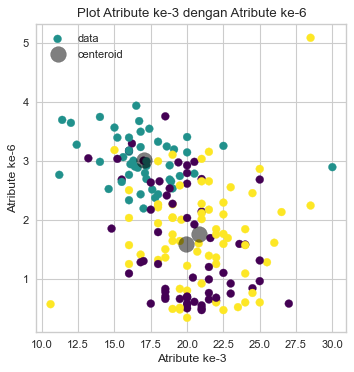

<Figure size 800x550 with 0 Axes>

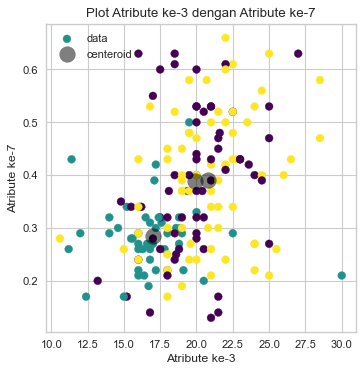

<Figure size 800x550 with 0 Axes>

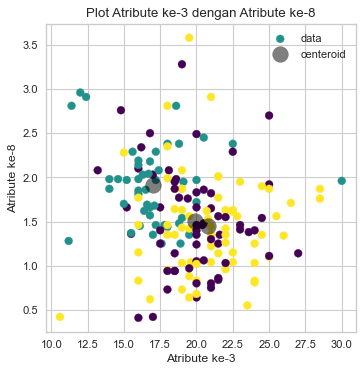

<Figure size 800x550 with 0 Axes>

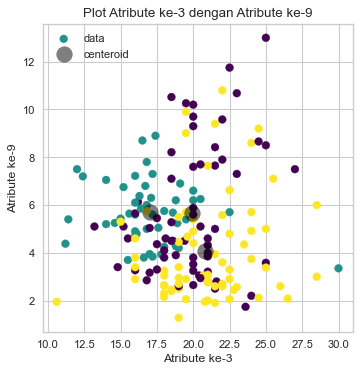

<Figure size 800x550 with 0 Axes>

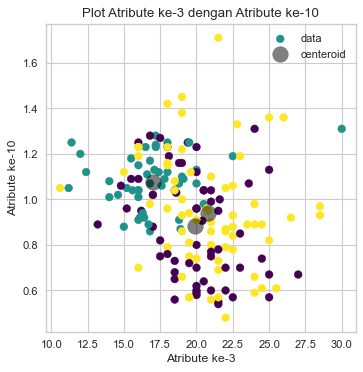

<Figure size 800x550 with 0 Axes>

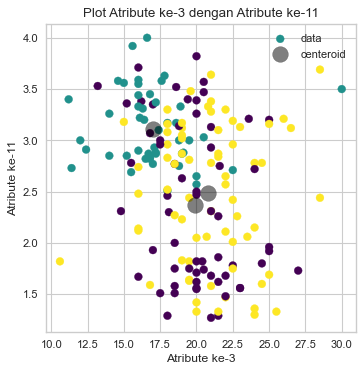

<Figure size 800x550 with 0 Axes>

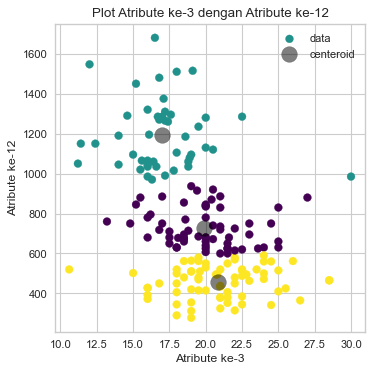

<Figure size 800x550 with 0 Axes>

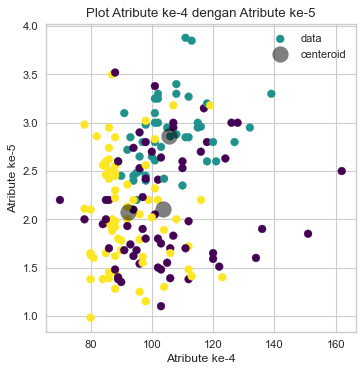

<Figure size 800x550 with 0 Axes>

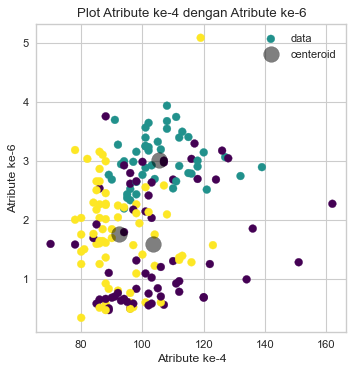

<Figure size 800x550 with 0 Axes>

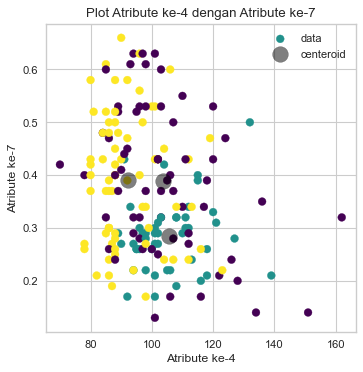

<Figure size 800x550 with 0 Axes>

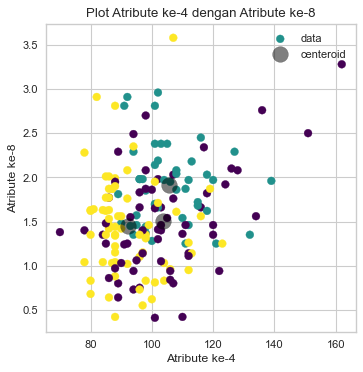

<Figure size 800x550 with 0 Axes>

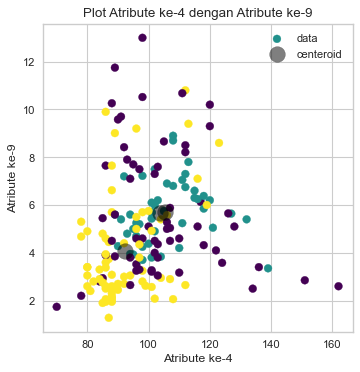

<Figure size 800x550 with 0 Axes>

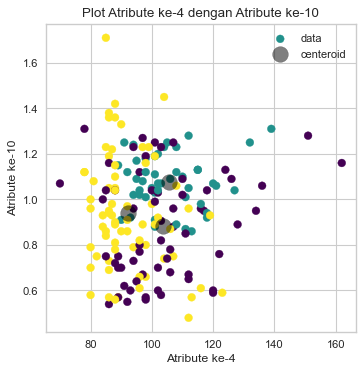

<Figure size 800x550 with 0 Axes>

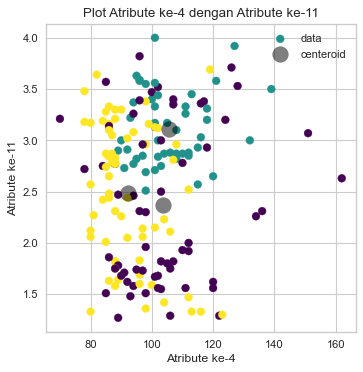

<Figure size 800x550 with 0 Axes>

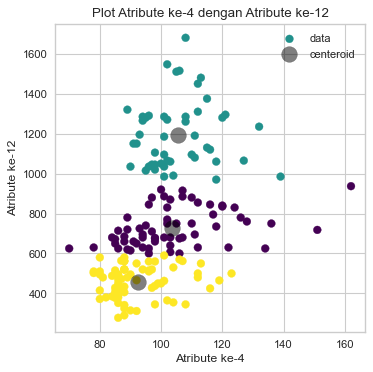

<Figure size 800x550 with 0 Axes>

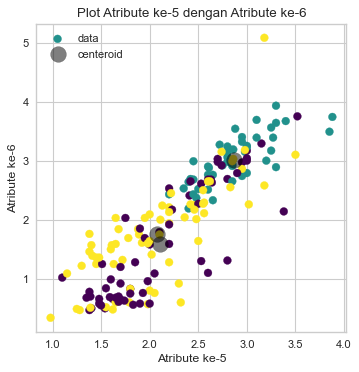

<Figure size 800x550 with 0 Axes>

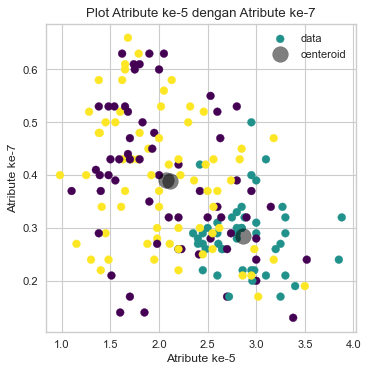

<Figure size 800x550 with 0 Axes>

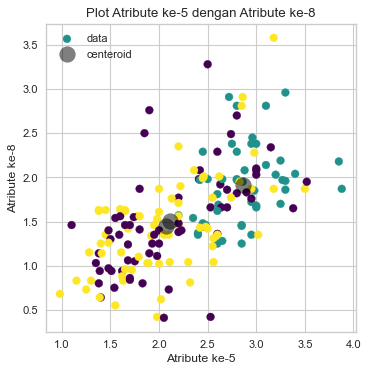

<Figure size 800x550 with 0 Axes>

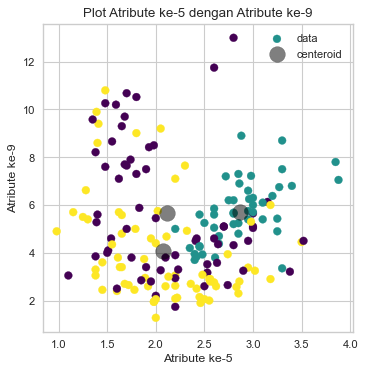

<Figure size 800x550 with 0 Axes>

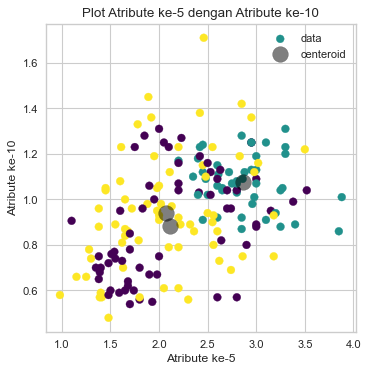

<Figure size 800x550 with 0 Axes>

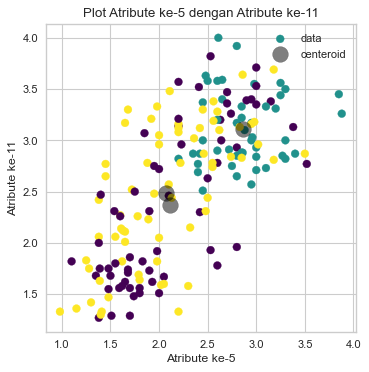

<Figure size 800x550 with 0 Axes>

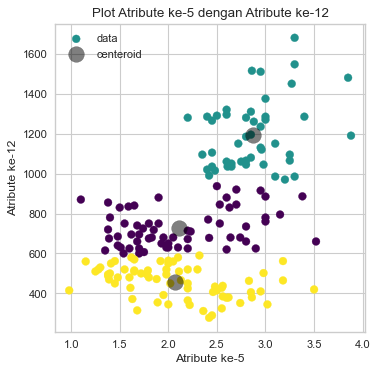

<Figure size 800x550 with 0 Axes>

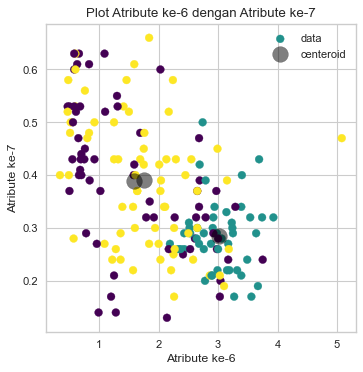

<Figure size 800x550 with 0 Axes>

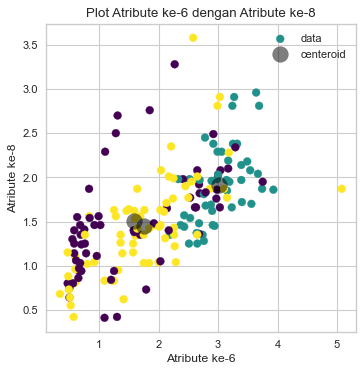

<Figure size 800x550 with 0 Axes>

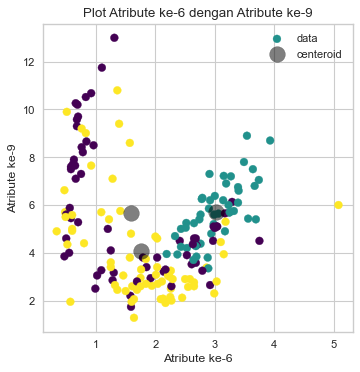

<Figure size 800x550 with 0 Axes>

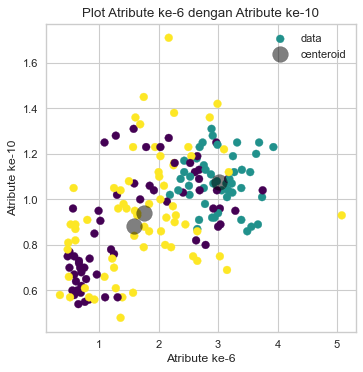

<Figure size 800x550 with 0 Axes>

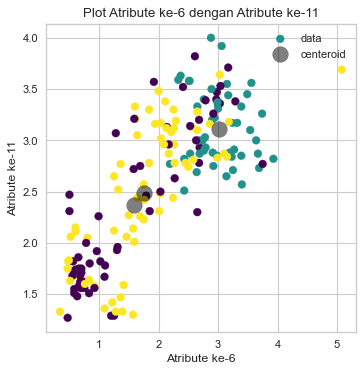

<Figure size 800x550 with 0 Axes>

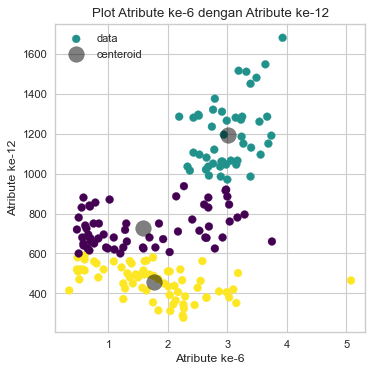

<Figure size 800x550 with 0 Axes>

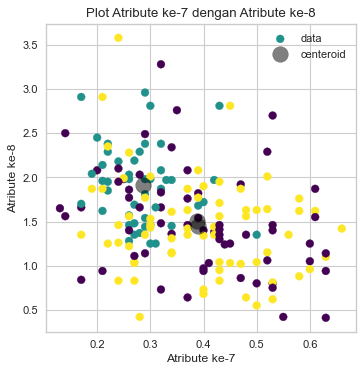

<Figure size 800x550 with 0 Axes>

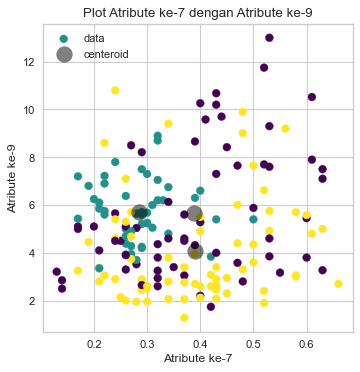

<Figure size 800x550 with 0 Axes>

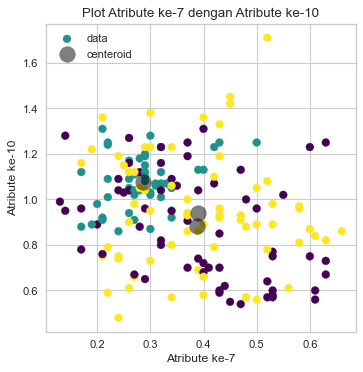

<Figure size 800x550 with 0 Axes>

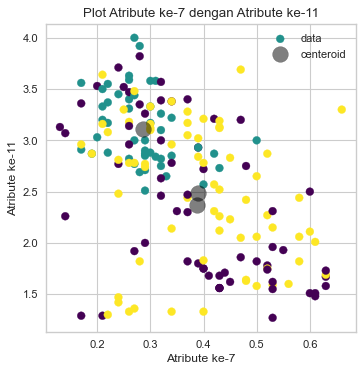

<Figure size 800x550 with 0 Axes>

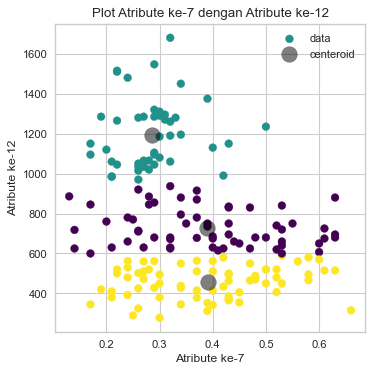

<Figure size 800x550 with 0 Axes>

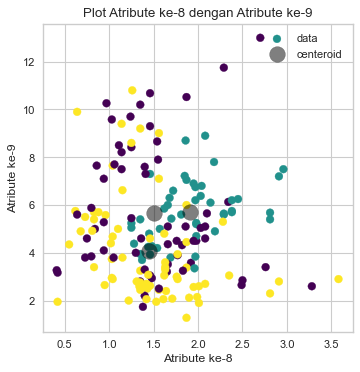

<Figure size 800x550 with 0 Axes>

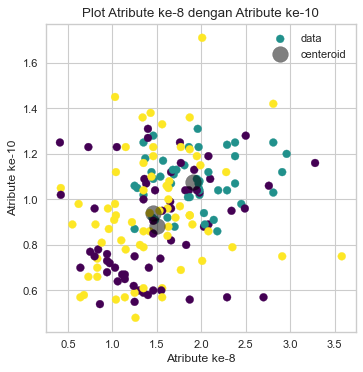

<Figure size 800x550 with 0 Axes>

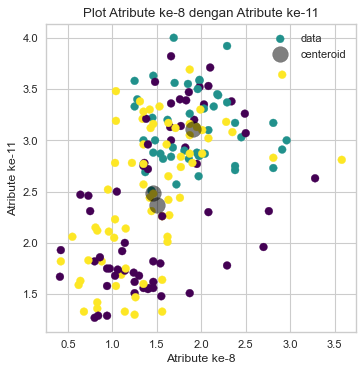

<Figure size 800x550 with 0 Axes>

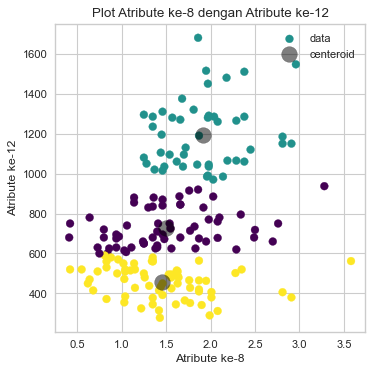

<Figure size 800x550 with 0 Axes>

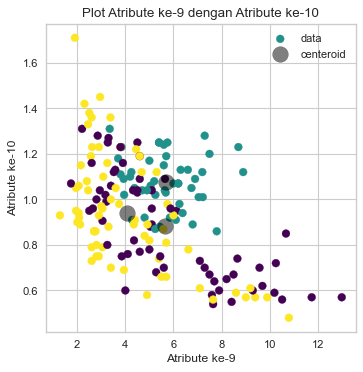

<Figure size 800x550 with 0 Axes>

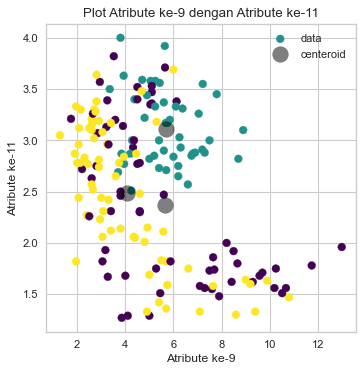

<Figure size 800x550 with 0 Axes>

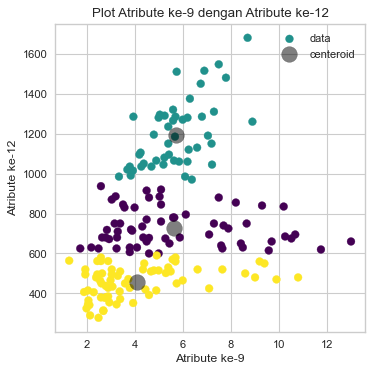

<Figure size 800x550 with 0 Axes>

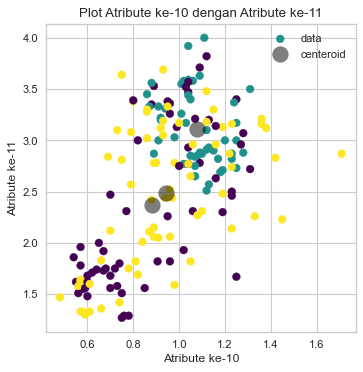

<Figure size 800x550 with 0 Axes>

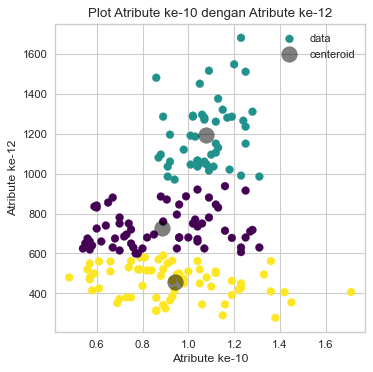

<Figure size 800x550 with 0 Axes>

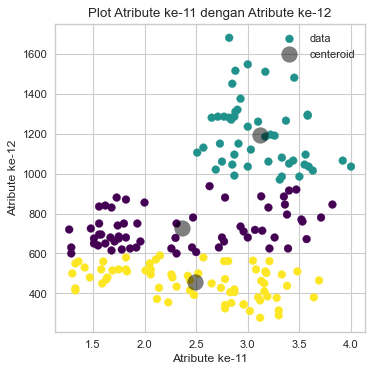

In [12]:
kolomdf=df_numpy.shape[1]
dfX=np.array(df_numpy)
f=0
for i in range (kolomdf-1):
    for j in range (i+1,kolomdf):
      plt.figure(f)
      f=f+1
      plt.figure(figsize=(5, 5), dpi=80)
      plt.scatter(dfX[:,i], dfX[:, j], c=y_kmeans, s=50, cmap='viridis', label='data')
      centers = kmeans.cluster_centers_
      plt.scatter(centers[:, i], centers[:, j], c='black', s=200, alpha=0.5, label='centeroid');
      xlabel='Atribute ke-'+str(i)
      ylabel='Atribute ke-'+str(j)
      titel='Plot '+str(xlabel)+' dengan '+str(ylabel)

      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      plt.title(titel)
      plt.legend()
      plt.show()

In [13]:
df_plot = df_wine
df_plot['cluster'] = y_kmeans

In [14]:
df_plot

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
0     3.92     1065        1  
1     3.40     1050        1  
2     3.17     1185        1  
3     3.45     1480        1  
4     2.93      735        0  
..     ...      ...      ...  
173   1.74      740        0  
174   1.56      750        0  
175   1.56      835        0  
176   1.62      840        0  
177   1.60      560        2  

[178 rows x 14 columns]

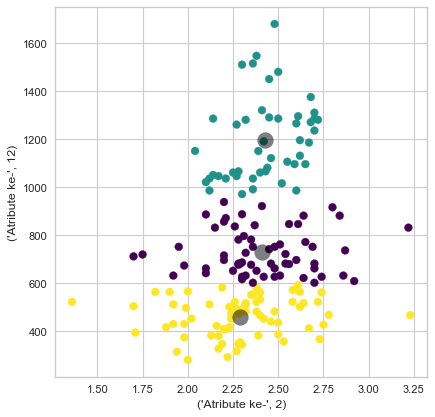

In [15]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(df_scatter[:,2], df_scatter[:,12], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:,12], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='Atribute ke-',2
ylabel='Atribute ke-',12
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [16]:
from sklearn.metrics.cluster import homogeneity_score
hom1= homogeneity_score(df_plot['Ash'],df_plot['Proline'])
print('Homogenity antara ash dengan proline :', hom1)

Homogenity antara ash dengan proline : 0.8756281042084196


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


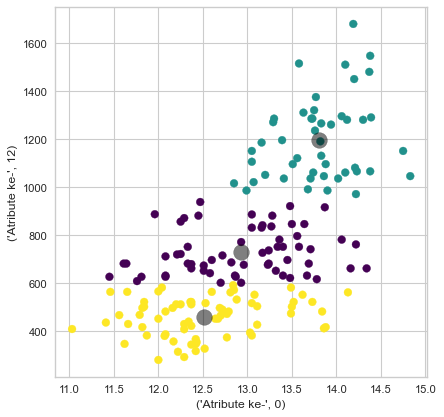

In [17]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(df_scatter[:,0], df_scatter[:,12], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,12], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='Atribute ke-',0
ylabel='Atribute ke-',12
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [18]:
from sklearn.metrics.cluster import homogeneity_score
hom1= homogeneity_score(df_plot['Alcohol'],df_plot['Proline'])
print('Homogenity antara Alcohol dengan Proline  :', hom1)

Homogenity antara Alcohol dengan Proline  : 0.8896672887543212


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [19]:
from sklearn.metrics.cluster import homogeneity_score
hom1= homogeneity_score(df_plot['Malic_Acid'],df_plot['Ash'])
hom2= homogeneity_score(df_plot['Malic_Acid'],df_plot['Proline'])
hom3= homogeneity_score(df_plot['Proline'],df_plot['Malic_Acid'])
hom4= homogeneity_score(df_plot['Proline'],df_plot['Ash'])

print('Homogenity antara Malic_Acid dengan Ash :', hom1)
print('Homogenity antara Malic_Acid dengan Proline :', hom2)
print('Homogenity antara Proline dengan Malic_Acid :', hom3)
print('Homogenity antara Proline dengan Ash :', hom4)

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects d

Homogenity antara Malic_Acid dengan Ash : 0.7882975131445156
Homogenity antara Malic_Acid dengan Proline : 0.8928065261714433
Homogenity antara Proline dengan Malic_Acid : 0.9129957569689082
Homogenity antara Proline dengan Ash : 0.7835102381389765


In [20]:
import plotly.express as px
fig = px.scatter_3d(df_plot, x='Malic_Acid', y='Proline', z='Ash', color='cluster', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [21]:
sns.pairplot(df_plot,hue='cluster',height=3);
plt.show()

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\DEDEN\AppData\Local\Programs\Py

In [ ]:
kmeans.fit(df_plot[['Malic_Acid', 'Ash', 'Proline']])
df_plot['cluster'] = kmeans.labels_

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
centroidsasli = pd.DataFrame(kmeans.cluster_centers_, columns=['Malic_Acid', 'Ash', 'Proline'])
import plotly.express as px
fig = px.scatter_3d(df_plot, x='Malic_Acid', y='Ash', z='Proline', color='cluster', opacity=1)
fig.add_trace(px.scatter_3d(centroidsasli, x='Malic_Acid', y='Ash', z='Proline',color_discrete_map={'Malic_Acid': 'red', 'Ash': 'red', 'Proline': 'red', 'centroids': 'black'}, size_max=10).data[0])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
from sklearn import metrics
score=metrics.davies_bouldin_score(df_wine, y_kmeans)
print ('Evaluasi Internal Davies-Bouldin Indeks untuk Algoritma Clustering:', score)

Evaluasi Internal Davies-Bouldin Indeks untuk Algoritma Clustering: 0.5342325818504589
